In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# **Load Data**

In [8]:
data = pd.read_csv(r'creditcard.csv')
print (data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [9]:
data = data.sample(frac=1)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.177331e-15,3.378987e-16,-1.399495e-15,2.094153e-15,1.006012e-15,1.495671e-15,-5.645408e-16,1.146121e-16,-2.411981e-15,...,1.611530e-16,-3.512210e-16,2.628794e-16,4.473091e-15,5.149188e-16,1.685152e-15,-3.657347e-16,-1.223773e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Check Missing Values ( If Exist ; Fill each record with mean of its feature )**

In [10]:
%time data.isnull().any()

Wall time: 30.5 ms


Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

# **Standardized the Input Variables**

In [11]:
data.reset_index(drop=True, inplace=True)
labels = data.pop('Class')

In [12]:
data -= data.mean()
data /= data.std()

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-4.470721e-17,-3.742233e-19,-1.332235e-17,-1.437017e-17,8.008378e-18,-8.956411e-18,8.357653e-18,8.706928e-18,1.247411e-19,1.247411e-19,...,-6.286951e-18,1.372152e-19,3.692336e-18,4.690265e-18,1.037222e-17,-6.436640e-18,1.177556e-17,2.257814e-18,-5.719379e-18,-3.372999e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.996580e+00,-2.879850e+01,-4.403521e+01,-3.187168e+01,-4.013912e+00,-8.240795e+01,-1.963602e+01,-3.520933e+01,-6.130242e+01,-1.222799e+01,...,-7.069134e+01,-4.741898e+01,-1.506562e+01,-7.175434e+01,-4.683630e+00,-1.975030e+01,-5.401088e+00,-5.590650e+01,-4.674604e+01,-3.532288e-01
25%,-8.552105e-01,-4.698909e-01,-3.624701e-01,-5.872131e-01,-5.993777e-01,-5.010677e-01,-5.766811e-01,-4.478852e-01,-1.746801e-01,-5.853621e-01,...,-2.746329e-01,-3.109428e-01,-7.473463e-01,-2.591780e-01,-5.854666e-01,-6.083990e-01,-6.780705e-01,-1.755050e-01,-1.604437e-01,-3.308395e-01
50%,-2.131450e-01,9.245335e-03,3.965677e-02,1.186122e-01,-1.401721e-02,-3.936675e-02,-2.058043e-01,3.241718e-02,1.871979e-02,-4.681161e-02,...,-8.104691e-02,-4.009422e-02,9.345360e-03,-1.792417e-02,6.765666e-02,3.183234e-02,-1.081215e-01,3.325168e-03,3.406362e-02,-2.652710e-01
75%,9.372158e-01,6.716927e-01,4.867194e-01,6.774557e-01,5.250073e-01,4.433457e-01,2.991620e-01,4.611099e-01,2.740780e-01,5.435296e-01,...,1.725730e-01,2.537387e-01,7.283347e-01,2.364315e-01,7.257141e-01,6.727994e-01,4.996654e-01,2.255644e-01,2.371521e-01,-4.471699e-02
max,1.642055e+00,1.253349e+00,1.335773e+01,6.187982e+00,1.191872e+01,2.521409e+01,5.502005e+01,9.747807e+01,1.675150e+01,1.419492e+01,...,5.113455e+01,3.703465e+01,1.447302e+01,3.607661e+01,7.569671e+00,1.442529e+01,7.293962e+00,7.831926e+01,1.025432e+02,1.023621e+02


# **Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).**

In [14]:
data_len = len(data)
train_data = data.iloc[:data_len*50//100]
val_data = data.iloc[data_len*50//100:data_len*70//100]
test_data = data.iloc[data_len*70//100:]
labels_len = len(labels)
train_labels = labels.iloc[:labels_len*50//100]
val_labels = labels.iloc[labels_len*50//100:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

# **Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).**

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network = models.Sequential()
network.add(layers.Dense(10,activation="tanh",input_shape=(len(train_data.columns),) ))
network.add(layers.Dense(8,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(6,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  %time MODEL = network.fit(train_data,train_labels,epochs=10,batch_size=256,validation_data=(val_data,val_labels))

Epoch 1/10
557/557 [==============================] - 3s 3ms/step - loss: 0.3109 - acc: 0.8953 - val_loss: 0.0058 - val_acc: 0.9993
Epoch 2/10
557/557 [==============================] - 1s 3ms/step - loss: 0.0050 - acc: 0.9993 - val_loss: 0.0039 - val_acc: 0.9993
Epoch 3/10
557/557 [==============================] - 2s 3ms/step - loss: 0.0037 - acc: 0.9993 - val_loss: 0.0036 - val_acc: 0.9994
Epoch 4/10
557/557 [==============================] - 1s 3ms/step - loss: 0.0039 - acc: 0.9991 - val_loss: 0.0034 - val_acc: 0.9994TA: 0s - loss: 0.0041 - acc
Epoch 5/10
557/557 [==============================] - 2s 3ms/step - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0035 - val_acc: 0.9994
Epoch 6/10
557/557 [==============================] - 2s 3ms/step - loss: 0.0038 - acc: 0.9992 - val_loss: 0.0034 - val_acc: 0.9995
Epoch 7/10
557/557 [==============================] - 2s 3ms/step - loss: 0.0029 - acc: 0.9995 - val_loss: 0.0033 - val_acc: 0.9994
Epoch 8/10
557/557 [=============================

In [16]:
test_loss , test_acc = network.evaluate(test_data,test_labels)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0024 - acc: 0.9995


In [17]:
test_labels[test_labels == 1]


199886    1
200009    1
200264    1
201275    1
201518    1
         ..
282272    1
282713    1
283375    1
284336    1
284427    1
Name: Class, Length: 140, dtype: int64

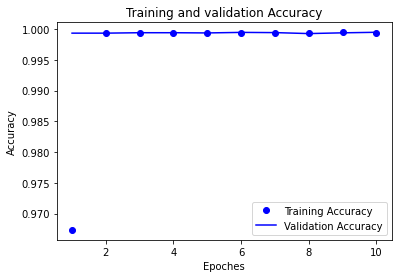

In [18]:
history_dict = MODEL.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
# plt.show()

# **Doing With RELU**

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network1 = models.Sequential()
network1.add(layers.Dense(30,activation="relu",input_shape=(len(train_data.columns),) ))
network1.add(layers.Dense(20,activation="relu"))
network1.add(layers.Dense(10,activation="relu" ))
network1.add(layers.Dense(1,activation="sigmoid"))
network1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  %time MODEL1 = network1.fit(train_data,train_labels,epochs=10,batch_size=512,validation_data=(val_data,val_labels))

Epoch 1/10
279/279 [==============================] - 3s 6ms/step - loss: 0.2489 - acc: 0.9321 - val_loss: 0.0054 - val_acc: 0.9991
Epoch 2/10
279/279 [==============================] - 1s 5ms/step - loss: 0.0052 - acc: 0.9992 - val_loss: 0.0042 - val_acc: 0.9993
Epoch 3/10
279/279 [==============================] - 2s 5ms/step - loss: 0.0034 - acc: 0.9994 - val_loss: 0.0039 - val_acc: 0.9993
Epoch 4/10
279/279 [==============================] - 1s 5ms/step - loss: 0.0041 - acc: 0.9994 - val_loss: 0.0038 - val_acc: 0.9993
Epoch 5/10
279/279 [==============================] - 1s 5ms/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0039 - val_acc: 0.9993
Epoch 6/10
279/279 [==============================] - 1s 5ms/step - loss: 0.0036 - acc: 0.9994 - val_loss: 0.0036 - val_acc: 0.9993
Epoch 7/10
279/279 [==============================] - 1s 5ms/step - loss: 0.0036 - acc: 0.9994 - val_loss: 0.0035 - val_acc: 0.9993
Epoch 8/10
279/279 [==============================] - 2s 6ms/step - loss: 0.

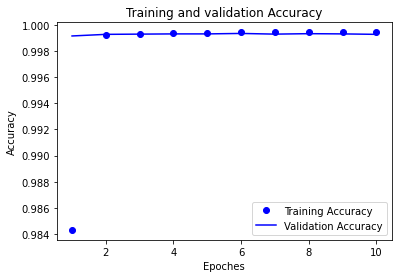

In [20]:
history_dict = MODEL1.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Evaluation Step**

In [21]:
test_loss , test_acc = network1.evaluate(test_data,test_labels)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0026 - acc: 0.9995A: 1s - loss: 0.0026 - acc: 0.9 - ETA: 1s - los


# **Predict**

In [22]:
prediction_test_data = test_data
predictions = network1.predict(prediction_test_data)

In [25]:
print(f"Allah ka shuker hy i got Accuracy is upto {test_acc*100}%")

Allah ka shuker hy i got Accuracy is upto 99.94733333587646%
